# Coding Quiz for L19-20 (13 Aug 2022)

Please complete the following notebook and submit using the following link:

https://forms.gle/jwBLDXJhN49miydZ7

You have 30 mins for this quiz. Good luck! 

---

**You are strongly recommended to run this notebook with GPUs.**

*(For Google Colab users, select Runtime> Change runtime type > Hardware Accelerator > GPU)*

### Step 1: Import the following libraries
- NumPy
- keras (from tensorflow)
- matplotlib.pyplot
- sklearn

[1 point]

In [16]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import sklearn

### Step 2: Load the MNIST dataset from keras.datasets

[1 point]

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

*Hint: The data can only be loaded in the following format:*

*(x train, y train), (x test, y test)*

### Step 3: Print the first image in the training dataset

[1 point]

Text(0.5, 1.0, 'Digit: 5')

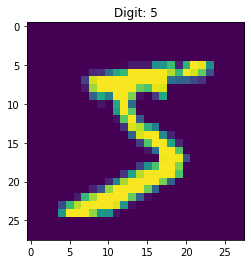

In [18]:
plt.figure()
plt.imshow(x_train[0])    
plt.title(f'Digit: {y_train[0]}')

**Sample output:**

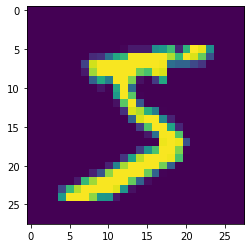

### Step 4:  Normalize the images in both training and testing datasets (rescale them to the range [0, 1])

[1 point]

In [19]:
# Normalize the images in both training and testing datasets (rescale them to the range [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

*Hint: The images are currently represented as integers in the range of [0, 255]. Remember to convert them to floats before normalization*

### Step 5: Reshape the images in both training and testing datasets to (28, 28, 1)

[1 point]

In [20]:
x_train2 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test2 = x_test.reshape(x_test.shape[0], 28, 28, 1)


### Step 6: Perform One-hot encoding on both training and testing labels

[1 point]

In [21]:
from sklearn.preprocessing import OneHotEncoder;
encoder = OneHotEncoder()
y_train2 = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test2 = encoder.transform(y_test.reshape(-1, 1)).toarray()

*Hint: There are 10 classes in the MNIST dataset*

### Step 7: Define a CNN model as follows:
- Input layer of shape (28, 28, 1)
- 2D convolution layer with 32 filters, kernel size (3,3), and relu activation
- 2D max pooling layer with pooling size (2, 2)
- 2D convolution layer with 64 filters, kernel size (3,3), and relu activation
- 2D max pooling layer with pooling size (2, 2)
- Flatten
- Fully-connected layer with 100 units and relu activation
- Dropout layer with dropout rate 0.2
- Output layer with softmax activation

[2 points]

In [22]:
input = keras.layers.Input((28, 28, 1));
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(input);
x = keras.layers.MaxPool2D((2, 2))(x);
x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x);
x = keras.layers.MaxPool2D((2, 2))(x);
x = keras.layers.Flatten()(x);
x = keras.layers.Dense(100, activation='relu')(x);
x = keras.layers.Dropout(0.2)(x);
output = keras.layers.Dense(10, activation='softmax')(x);

model = keras.models.Model(input, output)

### Step 8: Print the model summary

[1 point]

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0   

**Sample Output:**

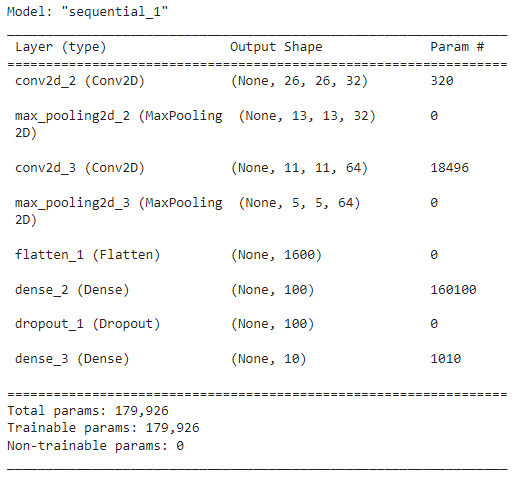

### Step 9: Compile the model using Adam as the optimizer, categorical crossentropy loss as the loss function, and categorical accuracy as the evaluation metric

[1 point]

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

### Step 10: Train the model using training data for 5 epochs with batch size 64

You should also split 10% of the training data for validation

Remember to save the losses and accuracies during training

[1 point]

In [25]:
history = model.fit(x_train2, y_train2, epochs=5, validation_data=(x_test2, y_test2), batch_size=64)

Epoch 1/5
938/938 [==============================] - 49s 52ms/step - loss: 0.1916 - categorical_accuracy: 0.9432 - val_loss: 0.0520 - val_categorical_accuracy: 0.9837
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0603 - categorical_accuracy: 0.9818 - val_loss: 0.0362 - val_categorical_accuracy: 0.9880
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0429 - categorical_accuracy: 0.9871 - val_loss: 0.0332 - val_categorical_accuracy: 0.9885
Epoch 4/5
938/938 [==============================] - 46s 50ms/step - loss: 0.0330 - categorical_accuracy: 0.9898 - val_loss: 0.0295 - val_categorical_accuracy: 0.9897
Epoch 5/5
938/938 [==============================] - 46s 50ms/step - loss: 0.0283 - categorical_accuracy: 0.9907 - val_loss: 0.0284 - val_categorical_accuracy: 0.9906


### Step 11: Plot the training and validation accuracies as a line graph

[1 point]

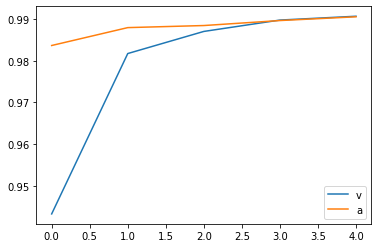

In [26]:
# Plot and Evaluate the Model
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend('accuracy')
plt.legend('val_accuracy')

**Sample output:**

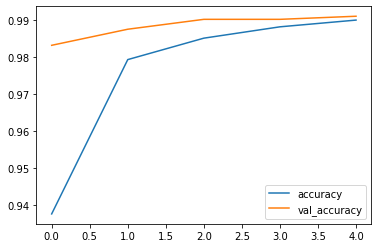

### Step 12: Evaluate the model using testing data
Print the loss and accuracy

[1 point]

In [27]:
from sklearn.metrics import accuracy_score, f1_score
# Let's Predict and Take a Look at the Output
predict = model.predict(x_test2)
predictions = np.argmax(predict, axis=1)
labels = np.argmax(y_test2, axis=1)

print(accuracy_score(labels, predictions))

# get categorical cross entropy loss
print(keras.losses.categorical_crossentropy(y_test2, predict, axis=1).numpy())

0.9906
[2.0802237e-05 1.5974172e-05 9.5367886e-06 ... 1.1920930e-07 4.2671277e-03
 1.1920930e-07]


**Sample Output:**

Test loss: 0.02639956586062908

Test accuracy: 0.9904000163078308

### Step 13: Generate predictions on the testing data

[1 point]

In [28]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

### Step 14: Evaluate the predictions using macro F1 score

[1 point]

In [29]:
print(f1_score(labels, predictions, average='macro'))

0.9905166299261008


*Hint: Remeber to convert the predictions and one-hot encoded labels back to class labels before calculating the macro F1 score*

**Sample Output:**

Macro F1 score: 0.9902870778760697

## End of Quiz! 👏
## Remember to save th output and submit your notebook!